# Feature Engineering

Use vaex to import data

In [6]:
import vaex

train = vaex.open('./train.csv.hdf5')

In [2]:
train.info()

## NA values count

In [38]:
res=sorted([(i,train[i].countna()) for i in train],key=lambda a:a[1], reverse=True)


PuaMode                                           	8919174
Census_ProcessorClass                             	8884852
DefaultBrowsersIdentifier                         	8488045
Census_IsFlightingInternal                        	7408759
Census_InternalBatteryType                        	6338429
Census_ThresholdOptIn                             	5667325
Census_IsWIMBootEnabled                           	5659703
SmartScreen                                       	3177011
OrganizationIdentifier                            	2751518
SMode                                             	537759
CityIdentifier                                    	325409
Wdft_IsGamer                                      	303451
Wdft_RegionIdentifier                             	303451
Census_InternalBatteryNumberOfCharges             	268755
Census_FirmwareManufacturerIdentifier             	183257
Census_IsFlightsDisabled                          	160523
Census_FirmwareVersionIdentifier                  	160133
Censu

In [41]:
size=train.shape[0]
for i in res:
    print("{} {}".format(i[0].ljust(50),i[1]/size))

PuaMode                                           	0.9997411865269485
Census_ProcessorClass                             	0.9958940682843872
DefaultBrowsersIdentifier                         	0.9514163732644001
Census_IsFlightingInternal                        	0.8304402978742436
Census_InternalBatteryType                        	0.7104680914596823
Census_ThresholdOptIn                             	0.635244723326828
Census_IsWIMBootEnabled                           	0.6343903810610859
SmartScreen                                       	0.35610794752397107
OrganizationIdentifier                            	0.3084148677972037
SMode                                             	0.0602768620418825
CityIdentifier                                    	0.0364747654621995
Wdft_IsGamer                                      	0.034013515465982504
Wdft_RegionIdentifier                             	0.034013515465982504
Census_InternalBatteryNumberOfCharges             	0.030124475941948215
Census_Firmwar

## unique value freq count

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import gc

gc.enable()

dropped_columns = ['MachineIdentifier','PuaMode','Census_ProcessorClass']

res = []
for i in train:
    if i not in dropped_columns:
        c=train[i].to_pandas_series().value_counts(dropna=True, normalize=True)
        print(c.values[0])
        res.append((i, c.values[0]))
        c.plot(kind='bar', title=i)
        plt.savefig('./pics/{}.png'.format(i))
        gc.collect()
        

res.sort(key=lambda a:a[1], reverse=True)

0.9893556934424468
0.43098966842171865
0.5760504167300436
0.011468608974539322
0.999992490037811
0.9732620555473995
0.9826662226448226
0.10625741167133478
0.6555310355507806
0.6987855844881108
0.9739837722286636
0.9879710581749693
0.04451860750056913
0.01102968634285838
0.6801427560772225
0.17171647086121147
0.23477991271182155
0.9660630413127503
0.9085300056055703
0.9676132320153499
0.43888678597493264
0.6232888635219055
0.43888734641987215
0.41004478862321
0.6180969016025699
0.9456237333912259
0.9999710810411229
0.9995370792263677
0.4384544967616122
0.7513628754740209
0.978582542301458
0.9939254677972246
0.6415210341150681
0.998382555904663
0.14585024594932816
0.03455872097967514


In [8]:
dropped_columns = ['PuaMode',
 'Census_ProcessorClass',
 'Census_IsWIMBootEnabled',
 'IsBeta',
 'Census_IsFlightsDisabled',
 'Census_IsFlightingInternal',
 'AutoSampleOptIn',
 'Census_ThresholdOptIn',
 'SMode',
 'Census_IsPortableOperatingSystem',
 'PuaMode',
 'Census_DeviceFamily',
 'UacLuaenable',
 'Census_IsVirtualDevice',
 'MachineIdentifier'
 ]

In [11]:
from vaex.ml.transformations import LabelEncoder

catogrical_features = [i for i in train if train[i].data_type() == str and i not in dropped_columns]

le=LabelEncoder(features=catogrical_features)
le_train=le.fit_transform(train)
le_train=le_train.drop(list(set(catogrical_features+dropped_columns)))

In [12]:
import numpy as np

le_train.fillna(0, inplace=True)

for i in le_train:
    if le_train[i].data_type() == object:
        le_train[i] = le_train[i].astype('int16')

### Bug on vaex, after label encoding, return type changed to ``DataFrameArrays``

In [57]:
le_train.export_hdf5('le_train.hdf5')

In [2]:
import vaex
le_train=vaex.open('le_train.hdf5')

In [3]:
df_train = le_train.to_pandas_df() # save mem space

(8921483, 69)
INFO:MainThread:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:MainThread:numexpr.utils:NumExpr defaulting to 8 threads.


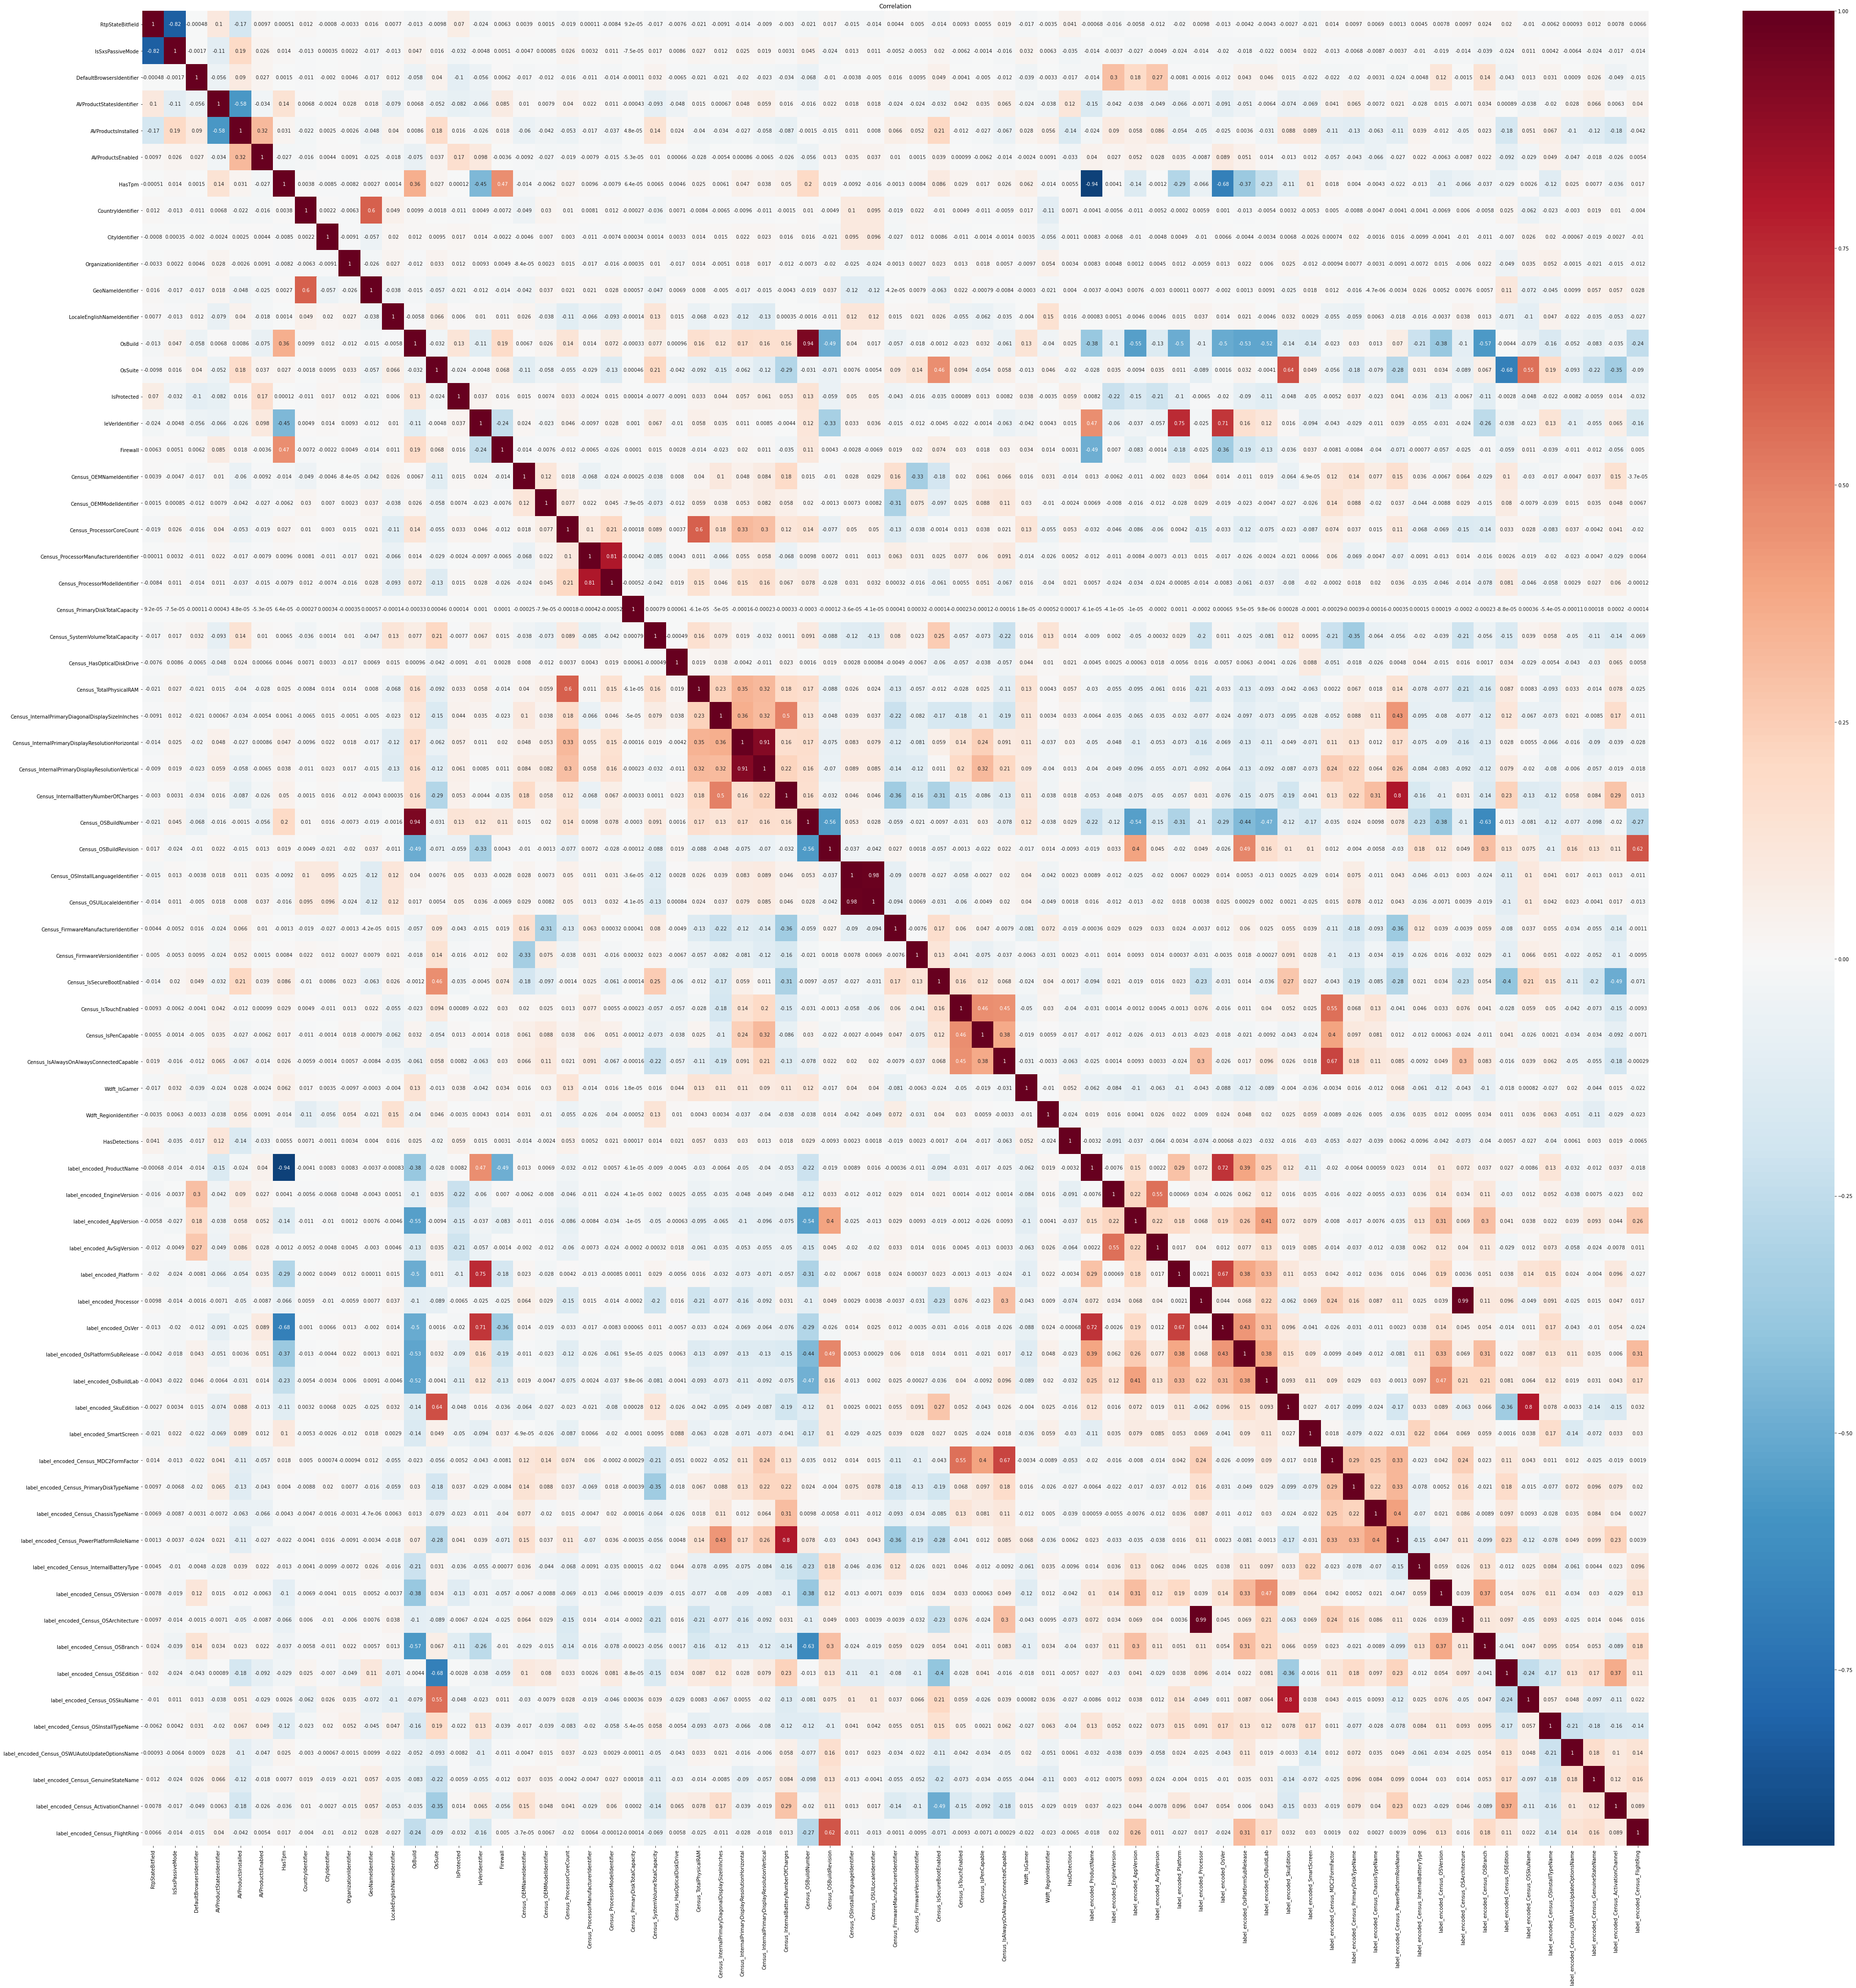

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cols = df_train.columns.tolist()

print(df_train.shape)

plt.figure(figsize=(69,69))

corr_res=df_train[cols].corr()

sns.heatmap(corr_res, cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation')
plt.show()


In [5]:
plt.savefig('./pics/heatmap.png')

<Figure size 432x288 with 0 Axes>